In [2]:
import requests,re,json
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/Gunnvant/case_study_ideas/main/data/retail_sales/campaign.json'
resp = requests.get(url)
data = json.loads(resp.text)
data

[{'ID_1826': {'AcceptedCmp1': 0,
   'AcceptedCmp2': 0,
   'AcceptedCmp3': 0,
   'AcceptedCmp4': 0,
   'AcceptedCmp5': 0,
   'Response': 1,
   'Complain': 0}},
 {'ID_1': {'AcceptedCmp1': 0,
   'AcceptedCmp2': 1,
   'AcceptedCmp3': 0,
   'AcceptedCmp4': 0,
   'AcceptedCmp5': 0,
   'Response': 1,
   'Complain': 0}},
 {'ID_10476': {'AcceptedCmp1': 0,
   'AcceptedCmp2': 0,
   'AcceptedCmp3': 0,
   'AcceptedCmp4': 0,
   'AcceptedCmp5': 0,
   'Response': 0,
   'Complain': 0}},
 {'ID_1386': {'AcceptedCmp1': 0,
   'AcceptedCmp2': 0,
   'AcceptedCmp3': 0,
   'AcceptedCmp4': 0,
   'AcceptedCmp5': 0,
   'Response': 0,
   'Complain': 0}},
 {'ID_5371': {'AcceptedCmp1': 0,
   'AcceptedCmp2': 0,
   'AcceptedCmp3': 1,
   'AcceptedCmp4': 0,
   'AcceptedCmp5': 0,
   'Response': 1,
   'Complain': 0}},
 {'ID_7348': {'AcceptedCmp1': 0,
   'AcceptedCmp2': 0,
   'AcceptedCmp3': 0,
   'AcceptedCmp4': 0,
   'AcceptedCmp5': 0,
   'Response': 1,
   'Complain': 0}},
 {'ID_4073': {'AcceptedCmp1': 0,
   'AcceptedCmp

In [3]:
rows=[]
for i in range(len(data)):
    for key,values in data[i].items():
        data_row=values
        rows.append(data_row)
df=pd.DataFrame(rows)
print(df)


      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             1             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             0             0   
2237             0             0             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             1             1   

      Response  Complain  
0            1         0  
1        

In [4]:
url = 'https://raw.githubusercontent.com/Gunnvant/case_study_ideas/main/data/retail_sales/behaviour.json'
resp = requests.get(url)
data = json.loads(resp.text)
rows=[]
keys=[]
for i in range(len(data)):
    for key,values in data[i].items():
        data_row=values
        keys.append(key)
        rows.append(data_row)
df2=pd.DataFrame(rows)
print(df2)

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0           0       189        104              379              111   
1           0       464          5               64                7   
2           0       134         11               59               15   
3           0        10          0                1                0   
4           0         6         16               24               11   
...       ...       ...        ...              ...              ...   
2235       99       372         18              126               47   
2236       99         5         10               13                3   
2237       99       185          2               88               15   
2238       99       267         38              701              149   
2239       99       169         24              553              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                  189           218                  1    

In [5]:
url = 'https://raw.githubusercontent.com/Gunnvant/case_study_ideas/main/data/retail_sales/demographics.txt'
df3 = pd.read_csv(url,delimiter="\t")
df3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND


In [6]:
#1.Create a consolidated view of data by joining the data present in three files.
d=pd.concat([df3,df2,df],axis=1)
d

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [7]:
#2.Are there any variables where you will need to clean the raw data, what kind of cleaning will be needed?
d.info()
d.isnull().sum()
# Yes for columns like AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain contains only boolean values instead given int64 data type and income should be considered as int64 but given as object and for column income there are 24 rows with null value and the column name income started with space.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Country              2240 non-null   object
 9   Recency              2240 non-null   int64 
 10  MntWines             2240 non-null   int64 
 11  MntFruits            2240 non-null   int64 
 12  MntMeatProducts      2240 non-null   int64 
 13  MntFishProducts      2240 non-null   int64 
 14  MntSweetProducts     2240 non-null   int64 
 15  MntGoldProds         2240 non-null   int64 
 16  NumDea

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64

In [17]:
#Create a data quality report after doing the necessary cleaning and joining of the files by:
# 1.Doing univariates for continous variables (compute: percentage of missing values, percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)
#A.I changed the income object to int64 by replacing "$",",",".00" with null character and converting the AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain to boolean data types.And all the null values in salary are replaced to zero.


d = d.rename(columns={d.columns.tolist()[4]:'Salary'})
d['Salary']=d['Salary'].str.replace("$","",regex=True)
d['Salary']=d['Salary'].str.replace(",","",regex=True)
d['Salary']=d['Salary'].str.replace(".00","",regex=True)
d["Salary"] = pd.to_numeric(d["Salary"])

d=d.fillna(0)

d['AcceptedCmp1'] = d['AcceptedCmp1'].astype('boolean')
d['AcceptedCmp2'] = d['AcceptedCmp2'].astype('boolean')
d['AcceptedCmp3'] = d['AcceptedCmp3'].astype('boolean')
d['AcceptedCmp4'] = d['AcceptedCmp4'].astype('boolean')
d['AcceptedCmp5'] = d['AcceptedCmp5'].astype('boolean')
d['Response'] = d['Response'].astype('boolean')
d['Complain'] = d['Complain'].astype('boolean')

df1=d.describe(include=[np.number],exclude=[bool])
df1.loc['90%']=d.quantile(q=0.9)
df1.loc['95%']=d.quantile(q=0.95)
df1.loc['NA%']=d.isnull().sum()/len(d)*100
df1.loc["0's%"]=d.astype(bool).sum(axis=0)
df1

,ID,Year_Birth,Salary,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,50120.197321,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,26853.711955,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,33455.500000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,50121.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,67480.500000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000
90%,10203.400000,1984.000000,79422.700000,1.000000,1.000000,89.000000,822.100000,83.000000,499.000000,120.000000,89.000000,122.000000,5.000000,8.000000,7.000000,11.000000,8.000000
95%,10675.050000,1988.000000,83844.000000,1.000000,1.000000,94.000000,1000.000000,123.000000,687.100000,168.050000,126.000000,165.050000,6.000000,9.000000,9.000000,12.000000,8.000000


In [9]:
# 2.Doing univariates for categorical variables (compute:percentage of missing values, number of unique values)
df5=d.describe(include=[object])
df5.loc['NA%']=d.isnull().sum()
df5

,Education,Marital_Status,Dt_Customer,Country
count,2240,2240,2240,2240
unique,5,8,663,8
top,Graduation,Married,8/31/12,SP
freq,1127,864,12,1095
NA%,0,0,0,0


C:\Users\arveti.manjunath\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


325 157146.0
497 160803.0
527 666666.0
731 162397.0
853 157733.0
1826 153924.0
1925 156924.0
2204 157243.0


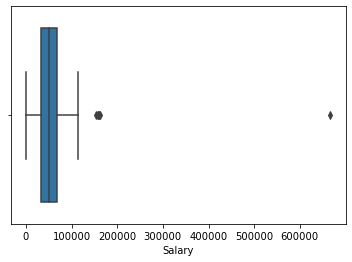

In [53]:
#4.Are there any extreme values of variables representing income, amount of money spent on various categories, recency of purchase?
#A.Yes.
#  For Income :
    #157146.0 at index 325 
    #160803.0 at index 497
    #666666.0 at index 527
    #162397.0 at index 731
    #157733.0 at index 853
    #153924.0 at index 1826
    #156924.0 at index 1925
    #157243.0 at index 2204
    
# For Amount on spent on various products:
    #2525 at index 671
    #2525 at index 672
    #2524 at index 1404
    
# For Recency:
    #No Extremeties.

import seaborn as sns
sns.boxplot(d['Salary'])
t=np.where(d['Salary']>150000)
for i in range(len(t)):
    for j in range(len(t[i])):
        print(t[i][j],end=" ")
        print(d.at[t[i][j],'Salary'])
        d.at[t[i][j],'Salary']=0
        

671 2525
672 2525
1404 2524


C:\Users\arveti.manjunath\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


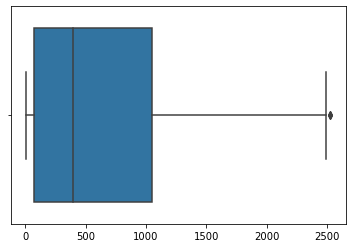

In [26]:
t1=d['MntWines']+d['MntFruits']+d['MntMeatProducts']+d['MntFishProducts']+d['MntSweetProducts']+d['MntGoldProds']
sns.boxplot(t1)
t=np.where(t1>2500)
for i in range(len(t)):
    for j in range(len(t[i])):
        print(t[i][j],end=" ")
        print(t1[t[i][j]])

C:\Users\arveti.manjunath\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency'>

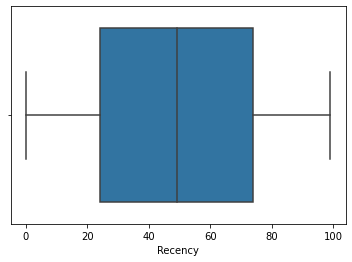

In [23]:
sns.boxplot(d['Recency'])

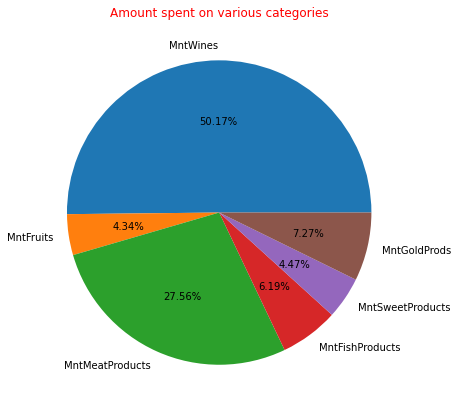

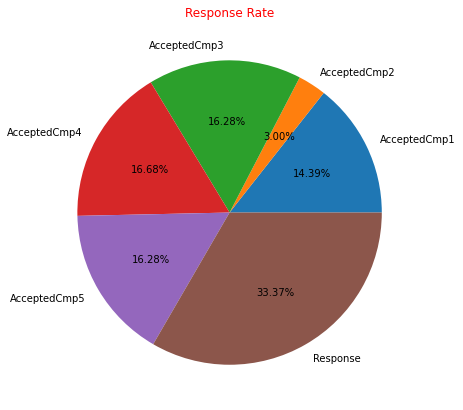

In [202]:
# 5.Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns
# A.From the pie chart it is shown that amount spent on wines is half of the total amount spent and amount spent on meat products is greater than 1/4th of total amount spent and MntFishProducts,MntGoldProds,MntSweetProducts,MntFruits consists of 1/4th of total amount spent.Least amount is spent on Fruits.
# From the pie chart of response rate it is shown that there is a significant decrease in campaign 2 as campaign 1 has more negative effect on campaign 2.And campaign 3 has significant increase from campaign 2 and a constant performance across campaign 4 and campaign 5.Last campaign had more response than all other campaigns so campaign 5 has produced positive effect for last campaign.

u=d.iloc[:,10:16].sum()
l=[]
for i in range(len(u)):
    l.append(u[i])

u1=d.iloc[1:1,10:16]
l1=list(u1.columns.values)




l2 = pd.DataFrame(list(zip(l1, l)),
               columns =['Products', 'Total'])


fig1=plt.figure(figsize=(10,7)) 
plt.pie(l2.Total,labels=l2.Products,autopct='%1.2f%%')
plt.title('Amount spent on various categories',color='Red')
plt.show()

#2.
y=d.iloc[:,21:27].sum()
l3=[]
for i in range(len(y)):
    l3.append(y[i])

y1=d.iloc[1:1,21:27]
l4=list(y1.columns.values)

l5=pd.DataFrame(list(zip(l4,l3)),columns=['Campaigns','TotalResponse'])


fig2=plt.figure(figsize=(10,7))
plt.pie(l5.TotalResponse,labels=l5.Campaigns,autopct='%1.2f%%')
plt.title('Response Rate',color='Red')
plt.show()

In [300]:
#6.Create a funnel analysis showing what percentage of unique customers accept campaign 1,2,3,..etc
#A.
accept=[]
accept.append(144)

c1=d[d['AcceptedCmp1']==0]
c2=c1.groupby(['AcceptedCmp2']).count()
accept.append(c2.at[1,'ID'])

c3=c1[c1['AcceptedCmp2']==0]
c4=c3.groupby(['AcceptedCmp3']).count()
accept.append(c4.at[1,'ID'])

c5=c3[c3['AcceptedCmp3']==0]
c6=c5.groupby(['AcceptedCmp4']).count()
accept.append(c6.at[1,'ID'])

c7=c5[c5['AcceptedCmp4']==0]
c8=c7.groupby(['AcceptedCmp5']).count()
accept.append(c8.at[1,'ID'])

c9=c7[c7['AcceptedCmp5']==0]
c10=c9.groupby(['Response']).count()
accept.append(c10.at[1,'ID'])

for i in range(len(accept)):
    print(accept[i]/len(d)*100)

6.428571428571428
0.7589285714285714
6.026785714285714
4.821428571428572
2.6339285714285716
6.517857142857143


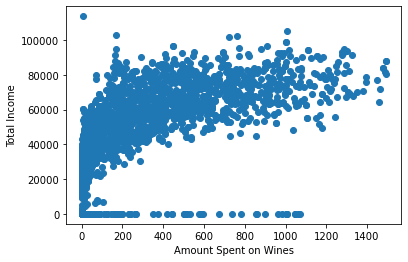

In [54]:
#7. Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products

#A.To find the impact of total income on various products i eliminated extremities.

#1.People with income 10000 to 20000 spend less amount on wines.From 20000 Amount spent on wines increases with income.

#2.People with Income less than 10000 spends a lot on Meat Products.From 20000 Amount spent on Meat Products increases with income.

#3.Highest amount on gold products was spent by people with income less than 10000.And from 20000 most people spend less amount in gold products.

#4.As income increases money spent on fish products increases.

import matplotlib.pyplot as plt

AmountSpent=np.array(d['Salary'])
y=AmountSpent
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Total Income')
plt.scatter(d['MntWines'],y)
plt.show()

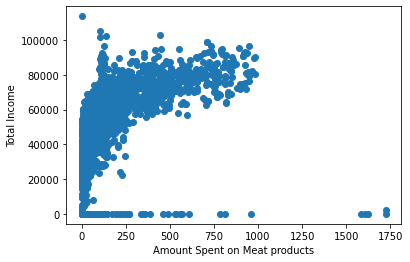

In [55]:
plt.xlabel('Amount Spent on Meat products')
plt.ylabel('Total Income')
plt.scatter(d['MntMeatProducts'],y)
plt.show()

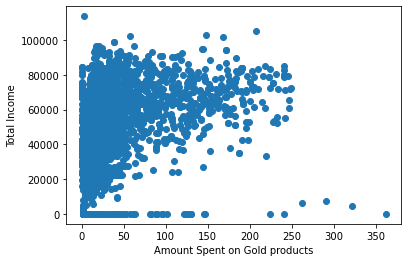

In [56]:
plt.xlabel('Amount Spent on Gold products')
plt.ylabel('Total Income')
plt.scatter(d['MntGoldProds'],y)
plt.show()

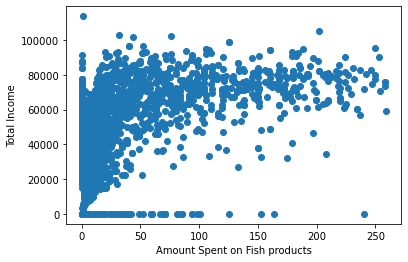

In [57]:
plt.xlabel('Amount Spent on Fish products')
plt.ylabel('Total Income')
plt.scatter(d['MntFishProducts'],y)
plt.show()

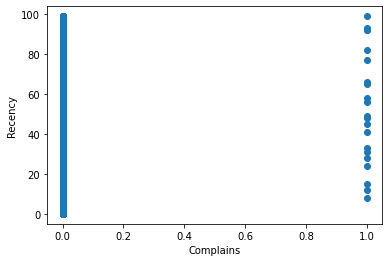

,ID,Year_Birth,Education,Marital_Status,Salary,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
206,10995,1988,2n Cycle,Married,15716.0,1,0,11/12/12,SA,8,...,0,4,8,False,False,False,False,False,False,True


In [77]:
#8.Can you test the hypothesis that recent customers complain less in general compared to older customers
#A. A total of 21 complains received in total from customers out of which 93% complains are from customers whose recency is more than 10.
plt.scatter(d['Complain'],d['Recency'])
plt.xlabel('Complains')
plt.ylabel('Recency')
plt.show()
t=d[d['Complain']==1]
t[t['Recency']<10]

In [237]:
#9.Do people who accept the offer in first campaign also accept in any other campaign?
#A. Yes people who accepted offer in first campaign some of them accepted in all campaigns.


d['AcceptedCmp1'] = d['AcceptedCmp1'].astype('int')
d['AcceptedCmp2'] = d['AcceptedCmp2'].astype('int')
d['AcceptedCmp3'] = d['AcceptedCmp3'].astype('int')
d['AcceptedCmp4'] = d['AcceptedCmp4'].astype('int')
d['AcceptedCmp5'] = d['AcceptedCmp5'].astype('int')
d['Response'] = d['Response'].astype('int')
d.groupby(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']).count()

ID  \
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 Response         
0            0            0            0            0            0         1631   
                                                                 1          146   
                                                    1            0           38   
                                                                 1           21   
                                       1            0            0           73   
                                                                 1           11   
                                                    1            0           12   
                                                                 1           12   
                          1            0            0            0           74   
                                                                 1           55   
                                                    1            0            4   
                                                                 1            2   
             1            0            0            0            1            1   
                                       1            0            0            5   
                                                                 1            3   
                                                    1            0            2   
                                                                 1            2   
                          1            0            0            0            2   
                                                    1            1            2   
1            0            0            0            0            0           39   
                                                                 1           13   
                                                    1            0            7   
                                                                 1           14   
                                       1            0            0            8   
                                                                 1            6   
                                                    1            0            4   
                                                                 1           19   
                          1            0            0            0            3   
                                                                 1            5   
                                                    1            0            3   
                                                                 1           10   
             1            0            1            0            1            2   
                                                    1            0            1   
                                                                 1            7   
                          1            0            1            1            3   

                                                                           Year_Birth  \
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 Response               
0            0            0            0            0            0               1631   
                                                                 1                146   
                                                    1            0                 38   
                                                                 1                 21   
                                       1            0            0                 73   
                                                                 1                 11   
                                                    1            0                 12   
                                                                 1                 12   
                          1            0            0            0                 74   
                          

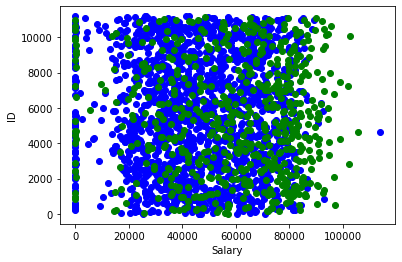

In [232]:
#10.Profile of people who respond vs who don't
# t - profile of people who doesnt respond.
# t1 - profile of people who responded to atleast one campaign.
t=d.loc[(d['AcceptedCmp1']==0) & (d['AcceptedCmp2']==0) & (d['AcceptedCmp3']==0) & (d['AcceptedCmp4']==0) & (d['AcceptedCmp5']==0) & (d['Response']==0)]
t
t1=pd.concat([d,t]).drop_duplicates(keep=False)
plt.xlabel('Salary')
plt.ylabel('ID')
plt.title('Income of people who respond vs who dont')
plt.scatter(t['Salary'],t['ID'],color='Blue')
plt.scatter(t1['Salary'],t1['ID'],color='Green')
plt.show()

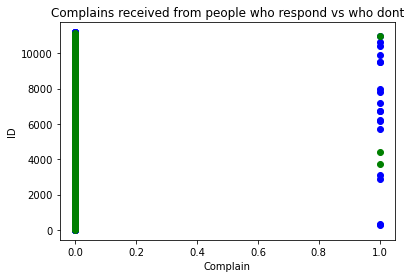

In [233]:
plt.xlabel('Complain')
plt.ylabel('ID')
plt.title('Complains received from people who respond vs who dont')
plt.scatter(t['Complain'],t['ID'],color='Blue')
plt.scatter(t1['Complain'],t1['ID'],color='Green')
plt.show()

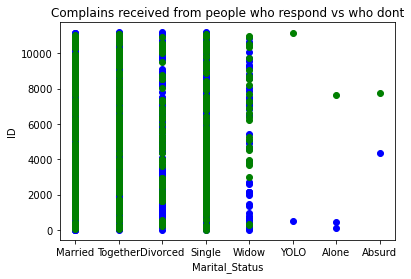

In [235]:
plt.xlabel('Marital_Status')
plt.ylabel('ID')
plt.title('Marital Status people who respond vs who dont')
plt.scatter(t['Marital_Status'],t['ID'],color='Blue')
plt.scatter(t1['Marital_Status'],t1['ID'],color='Green')
plt.show()

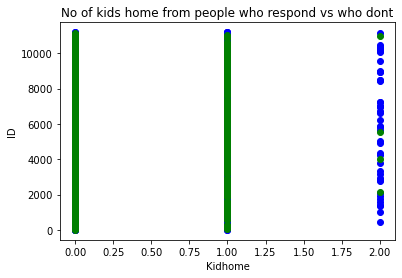

In [236]:
plt.xlabel('Kidhome')
plt.ylabel('ID')
plt.title('No of kids home from people who respond vs who dont')
plt.scatter(t['Kidhome'],t['ID'],color='Blue')
plt.scatter(t1['Kidhome'],t1['ID'],color='Green')
plt.show()

In [293]:
d.groupby(['AcceptedCmp1']).count()

,ID,Year_Birth,Education,Marital_Status,Salary,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
AcceptedCmp1,,,,,,,,,,,,,,,,,,,,,
0,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,...,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096
1,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
